### Trial for an advanced model with KNeighbor Regressor and Linear Regression and DescisionTree Regressor

In [38]:
# packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import StackingClassifier
from xgboost import XGBRegressor
 
%matplotlib inline

In [3]:
# read in the data
df = pd.read_csv("../data/Train.csv", sep = ',')
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping extra columns

In [4]:
columns_to_delete = ['Place_ID X Date', 
                     'target_min', 
                     'target_max',
                     'target_variance', 
                     'target_count', 
                     # 
                     'relative_humidity_2m_above_ground', 
                     'L3_NO2_NO2_slant_column_number_density',
                     'L3_NO2_stratospheric_NO2_column_number_density',  
                     'L3_SO2_SO2_slant_column_number_density',
                     #removing all sensor data and zenith and azimuth angle data
                     'L3_NO2_sensor_altitude', 
                     'L3_NO2_sensor_azimuth_angle',
                     'L3_NO2_sensor_zenith_angle', 
                     'L3_NO2_solar_azimuth_angle',
                     'L3_NO2_solar_zenith_angle',                  
                     'L3_O3_sensor_azimuth_angle',
                     'L3_O3_sensor_zenith_angle', 
                     'L3_O3_solar_azimuth_angle',
                     'L3_O3_solar_zenith_angle',
                     'L3_CO_sensor_altitude', 
                     'L3_CO_sensor_azimuth_angle',
                     'L3_CO_sensor_zenith_angle', 
                     'L3_CO_solar_azimuth_angle',
                     'L3_CO_solar_zenith_angle',
                     'L3_HCHO_sensor_zenith_angle', 
                     'L3_HCHO_solar_azimuth_angle',
                     'L3_HCHO_sensor_azimuth_angle',
                     'L3_HCHO_solar_zenith_angle',
                     'L3_CLOUD_sensor_azimuth_angle', 
                     'L3_CLOUD_sensor_zenith_angle',
                     'L3_CLOUD_solar_azimuth_angle', 
                     'L3_CLOUD_solar_zenith_angle',
                     'L3_AER_AI_sensor_altitude', 
                     'L3_AER_AI_sensor_azimuth_angle',
                     'L3_AER_AI_sensor_zenith_angle', 
                     'L3_AER_AI_solar_azimuth_angle',
                     'L3_AER_AI_solar_zenith_angle',
                     'L3_SO2_sensor_azimuth_angle', 
                     'L3_SO2_sensor_zenith_angle',
                     'L3_SO2_solar_azimuth_angle', 
                     'L3_SO2_solar_zenith_angle', 
                     # removing columns with 80% missing values
                     'L3_CH4_sensor_azimuth_angle', 
                     'L3_CH4_sensor_zenith_angle',
                     'L3_CH4_solar_azimuth_angle', 
                     'L3_CH4_solar_zenith_angle',
                     'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
                     'L3_CH4_aerosol_height',
                     'L3_CH4_aerosol_optical_depth'  
                    ]

df_reduced = df.drop(columns = columns_to_delete, axis = 1)

 #### Split training dataset into train and test data

In [5]:
RSEED = 9 

# Define x/y
X = df_reduced
y = np.array(X.pop('target'))

# split train/test data
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = RSEED)

Change date to datetime format

In [7]:
X['Date'] = pd.to_datetime(X['Date'])

In [6]:
train_X = train_X.drop(['Date', 'Place_ID'], axis = 1)

In [7]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24445 entries, 29510 to 24958
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   precipitable_water_entire_atmosphere                 24445 non-null  float64
 1   specific_humidity_2m_above_ground                    24445 non-null  float64
 2   temperature_2m_above_ground                          24445 non-null  float64
 3   u_component_of_wind_10m_above_ground                 24445 non-null  float64
 4   v_component_of_wind_10m_above_ground                 24445 non-null  float64
 5   L3_NO2_NO2_column_number_density                     22688 non-null  float64
 6   L3_NO2_absorbing_aerosol_index                       22688 non-null  float64
 7   L3_NO2_cloud_fraction                                22688 non-null  float64
 8   L3_NO2_tropopause_pressure                           22687 non-null

#### check distribution of features

In [34]:
train_X.columns

Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density', 'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_cloud_fraction', 'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_cloud_fraction',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_t

In [37]:
skewed= ['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'L3_NO2_cloud_fraction',
       'L3_O3_O3_column_number_density', # bad outliers
       #'L3_O3_cloud_fraction', bimodal??
        'L3_CO_CO_column_number_density', # outlier
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
        'L3_HCHO_cloud_fraction',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf', # outlier
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       #'L3_CLOUD_cloud_fraction', # bimodal
         'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       #'L3_SO2_SO2_column_number_density_amf', outlier
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction']

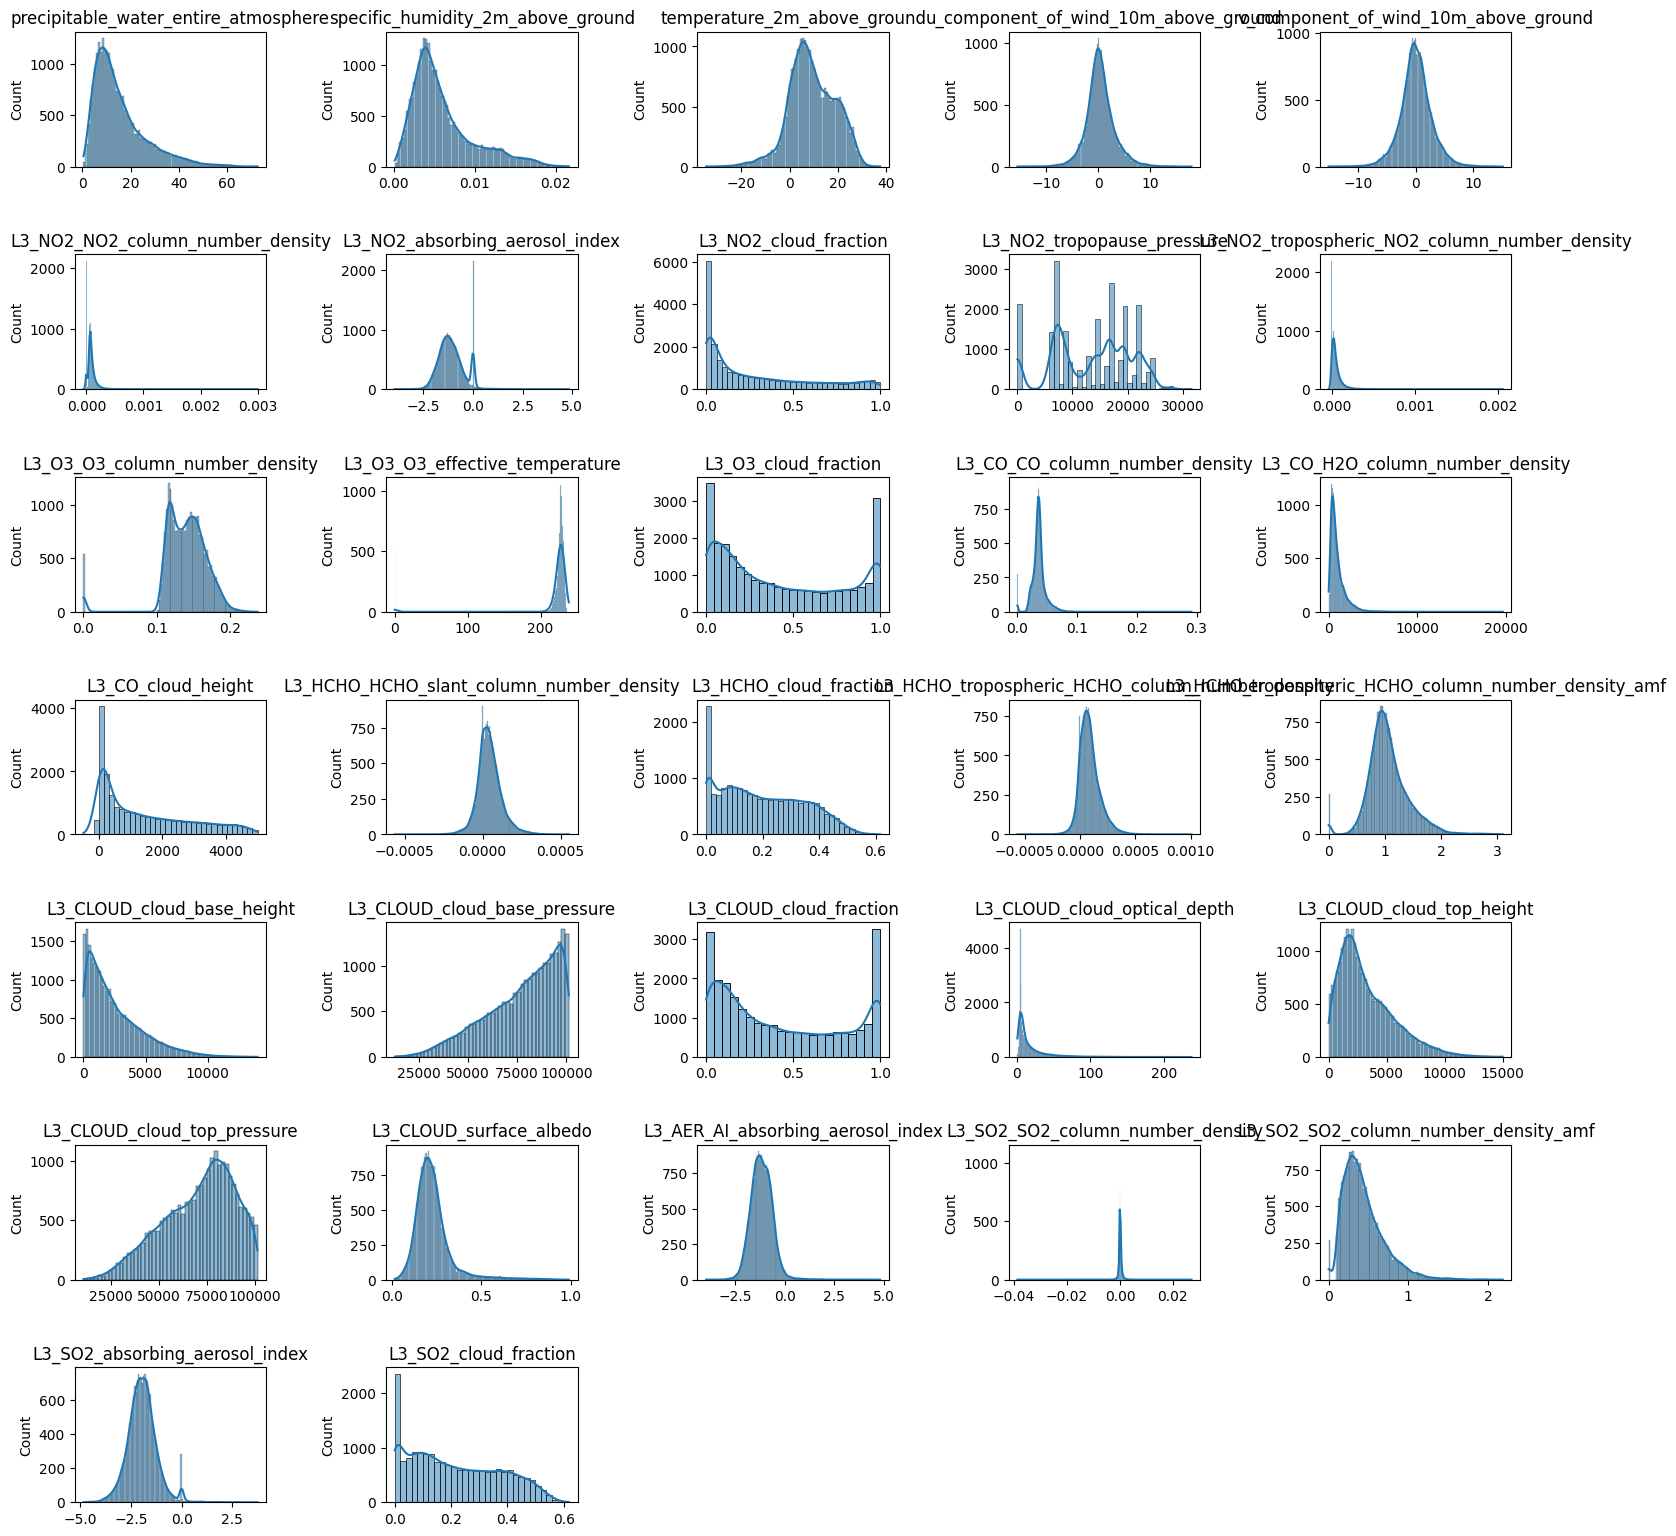

In [36]:
# Plot histograms for train data #Histplot for every item in X_train:
fig,ax = plt.subplots(7,5,figsize=(16,16))
count = 0
for i in range (7):
    for j in range (5):
        if count < len (train_X.columns):
            item = train_X.columns[count]
            sns.histplot(train_X[item], kde=True, ax=ax[i][j]).set(title = item, xlabel ='')
            count += 1
        else:
            ax[i][j].set_visible(False)
fig.tight_layout(pad=3)

Pipeline for Feature Engineering and Lin Reg Modeling

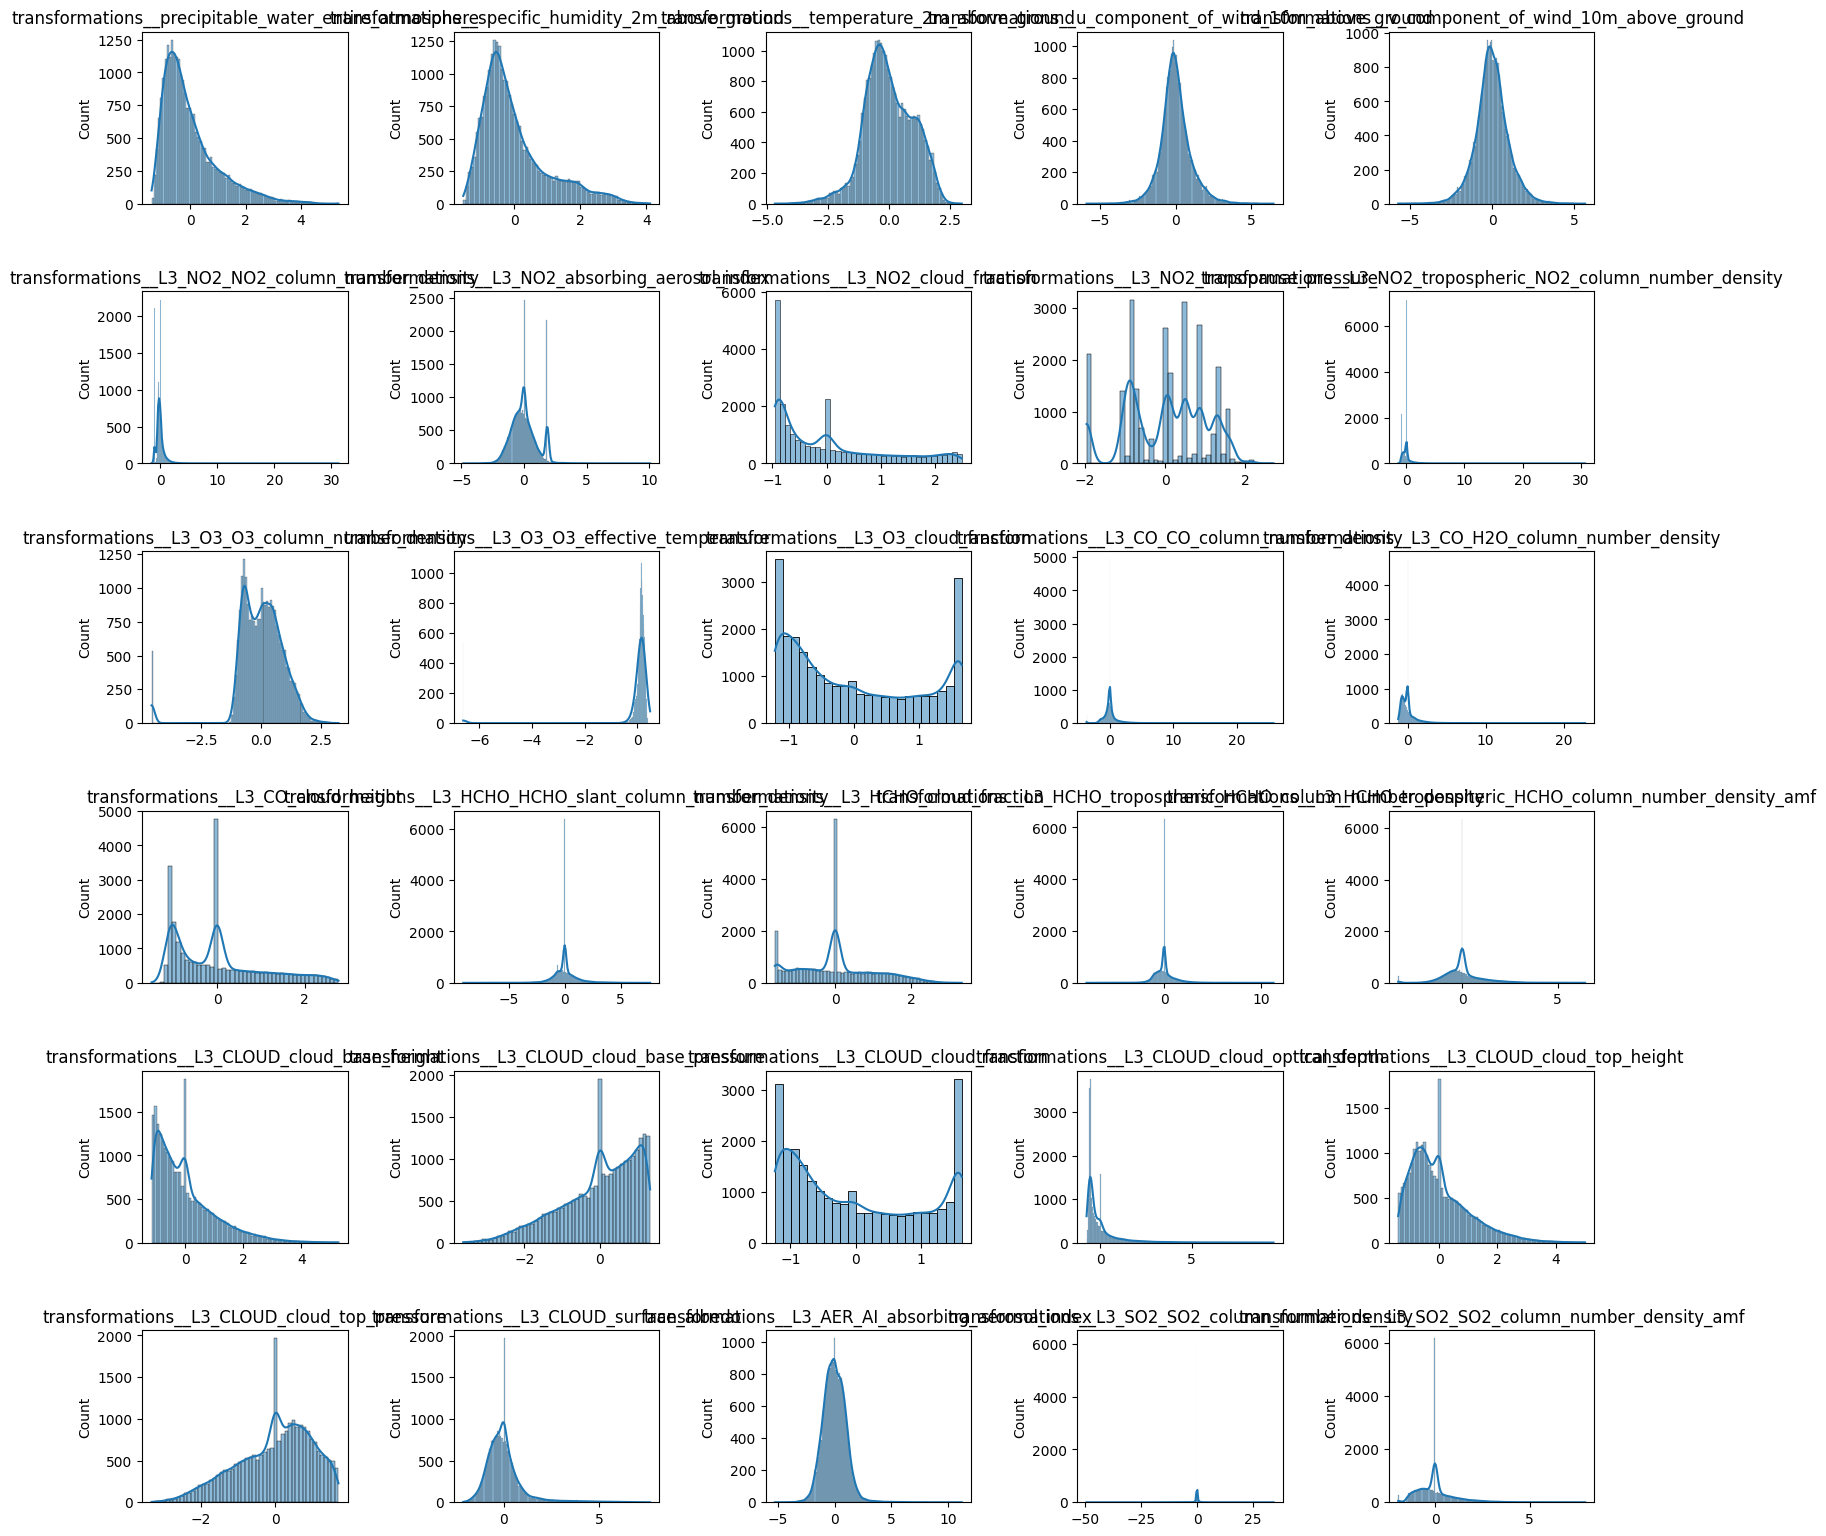

In [83]:
#Histplot for every item in X_train after transformation:
fig,ax = plt.subplots(6,5,figsize=(16,16))
count = 0
for i in range (6):
    for j in range (5):
        if count < len (train_X_trans_df.columns):
            item = train_X_trans_df.columns[count]
            sns.histplot(train_X_trans_df[item], kde=True, ax=ax[i][j]).set(title = item, xlabel ='')
            count += 1
        else:
            ax[i][j].set_visible(False)
fig.tight_layout(pad=3)

## Scaling just changes the scale but not the distribution, so actually all skewed features need to be log-transformed (?)

In [57]:
# impute missing values and transform
preprocessing_base = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='mean')), 
    ('standard_scaler', StandardScaler())
])

In [58]:
# log transform
preprocessing_log_pipe = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='mean')), 
    ('log_transform', FunctionTransformer(log_transform)),
    ('standard_scaler', StandardScaler())
])

In [9]:
preprocessing = ColumnTransformer([
    ('transformations', preprocessing_base, X.columns.drop(['Place_ID', 'Date'])),
])

In [64]:
def log_transform(x):
    print(x)
    return np.log(x + 1)

In [59]:
preprocessing_log = ColumnTransformer([
    ('transformations', preprocessing_base, X.columns.drop(['Place_ID', 'Date'])),
    ('tackle skewed', preprocessing_log_pipe, skewed)
])

In [60]:
pipe_linReg_log = Pipeline([
    ('preprocessor', preprocessing_log),
    ('regressor', LinearRegression())
])

In [63]:
pipe_linReg_log.fit(train_X, train_y) # not possible to hande negative values

[[ 2.89000009e+01  1.34287206e-02  2.25879761e+01 ...  6.94415883e+04
  -1.94288358e+00  2.12907232e-01]
 [ 5.19000015e+01  1.78100001e-02  2.46925598e+01 ...  9.45117373e+04
   0.00000000e+00  0.00000000e+00]
 [ 1.53714286e+01  5.50635645e-03  8.00069144e+00 ...  3.48930397e+04
  -1.87563076e+00  1.04342815e-02]
 ...
 [ 5.00000000e+00  4.56043705e-03  9.44072876e+00 ...  9.06077650e+04
  -1.10965781e+00  1.42138342e-01]
 [ 1.63999996e+01  4.86504054e-03  1.49229065e+01 ...  5.54818514e+04
  -1.64560085e+00  1.94648102e-02]
 [ 7.00000000e+00  4.17507626e-03  4.08132324e+00 ...  2.20124428e+04
  -1.94288358e+00  2.12907232e-01]]


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_4340\1316496885.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x + 1)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
y_train_predicted = pipe_linReg_log.predict(train_X)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_train_predicted, squared=False)))

NameError: name 'pipe_linReg_log' is not defined

In [54]:
y_test_predicted = pipe_linReg_log.predict(test_X)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_test_predicted, squared=False)))


RMSE: 37.21


With a simple linear regression just with imputing and scaling, the RMSE for training is 39.10 and for test 37.21

Residual Plots to check the fitting of the linear regression

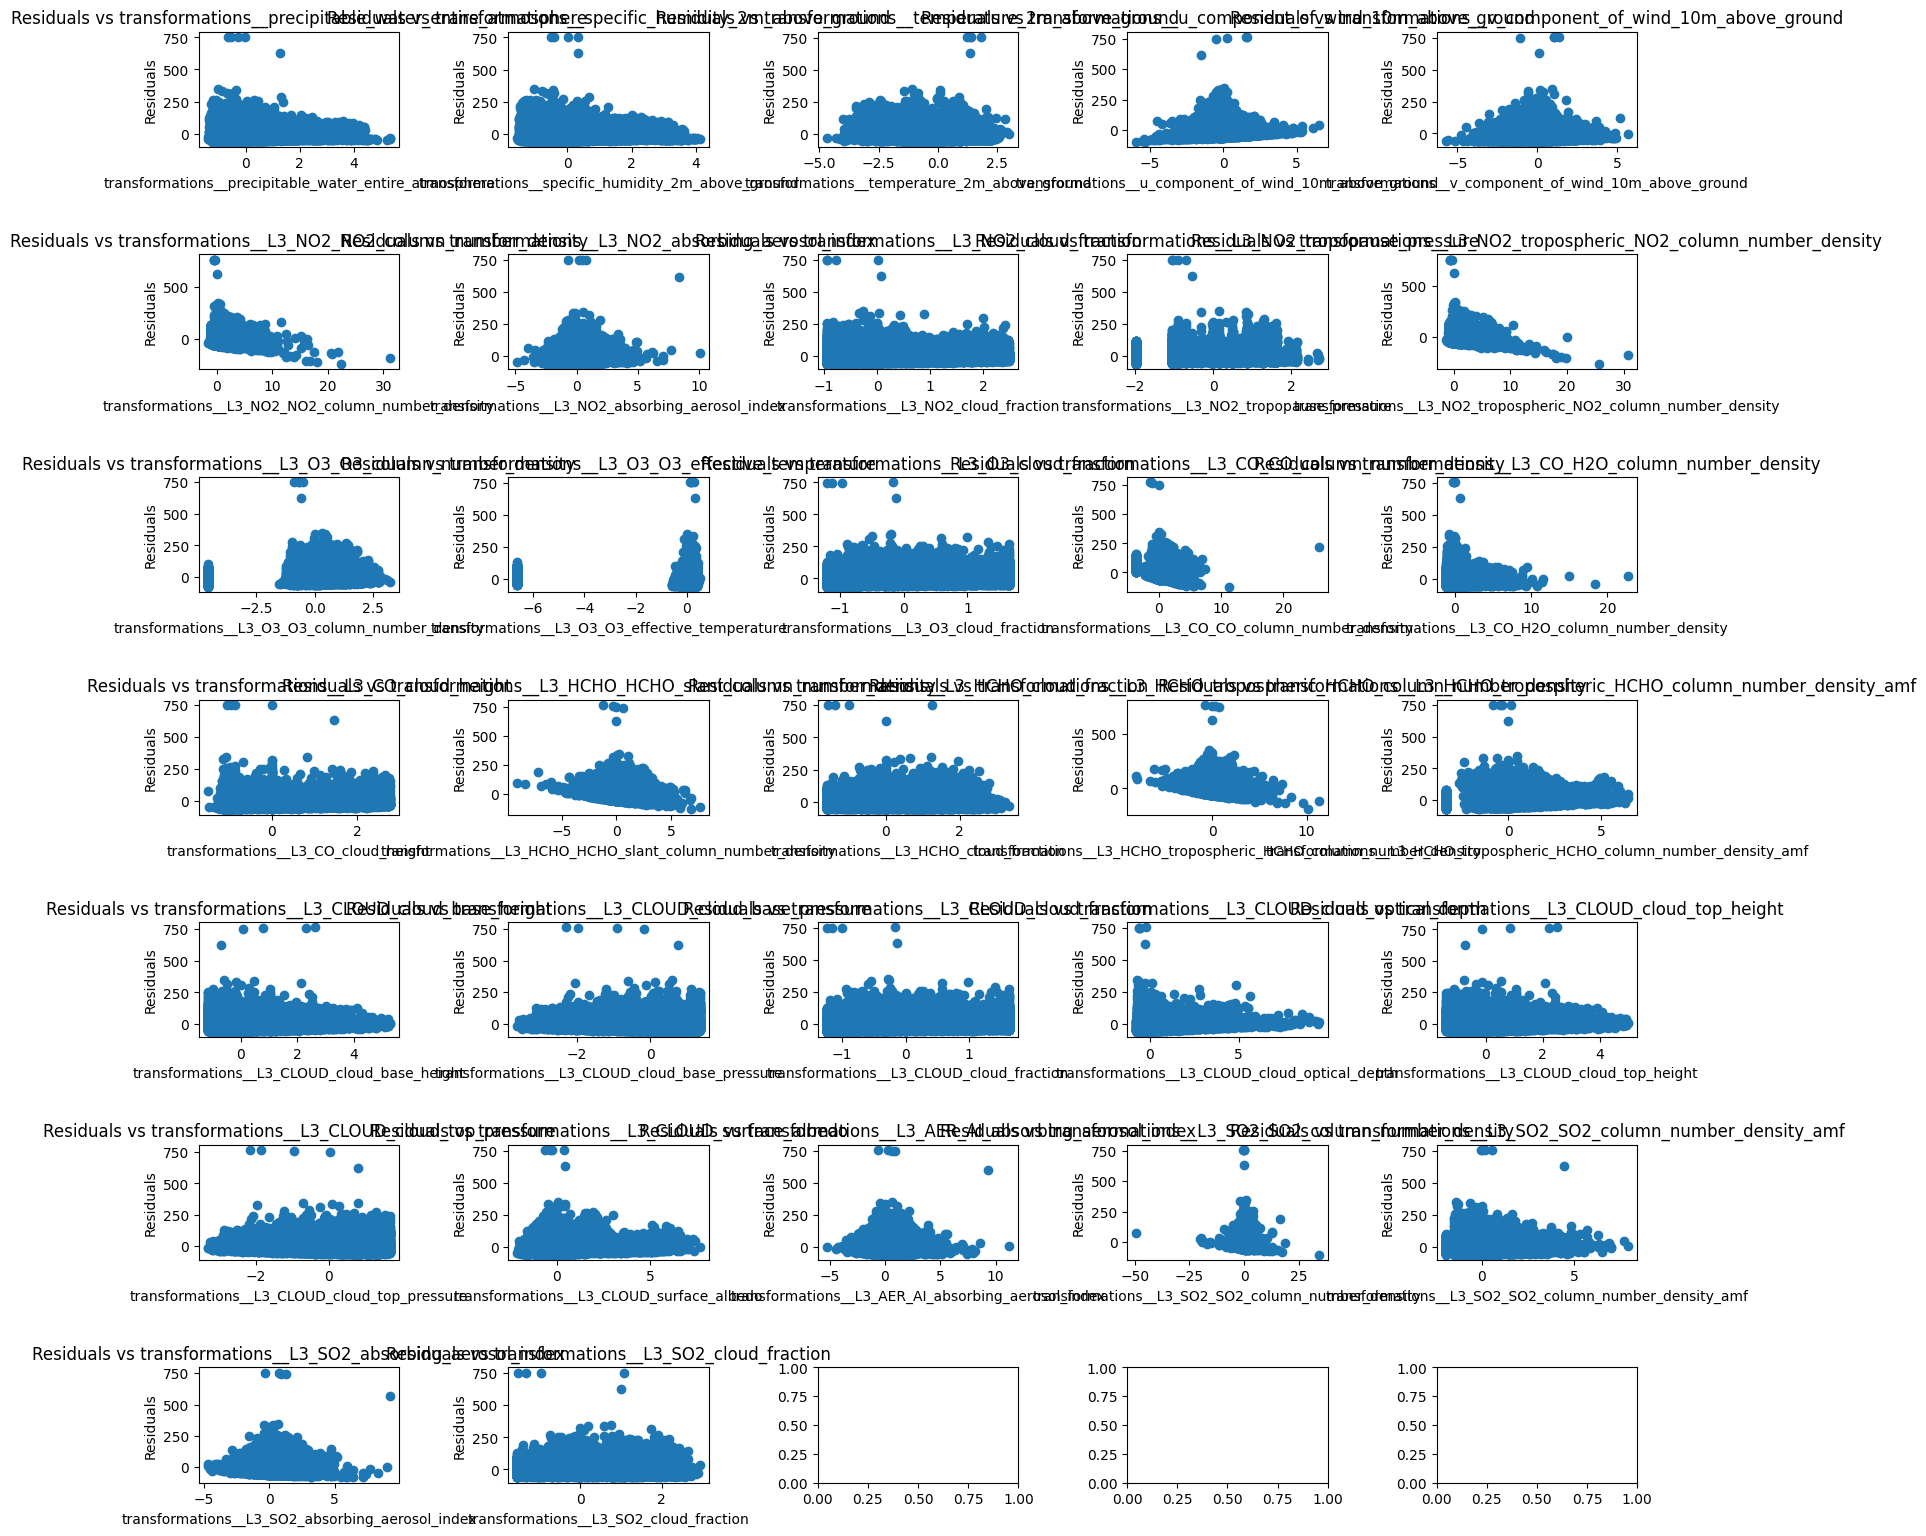

In [94]:
# Iterate through columns to plot residuals
fig,axes = plt.subplots(7,5,figsize=(16,16))
total_subplots = 33
# Flatten the axes to simplify indexing
axes = axes.flatten()
count = 0
for column in train_X_trans_df.columns: 
            x = train_X_trans_df[column]
            y = train_y

            # Fit a linear regression model
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

            # Calculate residuals
            residuals = y - (slope * x + intercept)

            # Plot residuals
            axes[count].scatter(x, residuals)
            axes[count].set_ylabel("Residuals")
            axes[count].set_xlabel(column)
            axes[count].set_title(f"Residuals vs {column}")
            
            count += 1
            
            # Break the loop if the number of subplots is reached
            if count >= total_subplots:
                break
fig.tight_layout(pad=3)

#### Changing Model to a random Forest column transformer and forest single vs. all in a pipeline

In [18]:
preprocessing

ColumnTransformer(transformers=[('transformations',
                                 Pipeline(steps=[('imputing', SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number...
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction'],
      dtype='object'))])

Random Forest in a pipeline, but no feature importance possible

In [10]:
pipe_randFor = Pipeline([
    ('preprocessor', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=100,random_state=RSEED,max_features = 'sqrt',n_jobs=-1, verbose = 3))
])

In [11]:
pipe_randFor.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transformations',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_g...
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_features='sqrt', n_jobs=-1,
                                       random_state=9, verbose=3))])

In [12]:
y_train_predicted = pipe_randFor.predict(train_X)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_train_predicted, squared=False)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s


RMSE: 12.25


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [13]:
y_test_predicted = pipe_randFor.predict(test_X)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_test_predicted, squared=False)))


RMSE: 30.72


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


**Saving transformed data in a new df and modeling a randomForest**

In [14]:
train_X_trans = preprocessing.fit_transform(train_X)

In [15]:
#Get column names back and reshape the array into a df:
transformed_columns = preprocessing.get_feature_names_out(train_X.columns)
train_X_trans_df = pd.DataFrame(train_X_trans, columns=transformed_columns)


In [25]:
tree = RandomForestRegressor(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [27]:
tree.fit(train_X_trans_df, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=9, verbose=1)

In [28]:
# how many nodes of each tree
n_nodes = []
max_depths = []

for ind_tree in tree.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 28646
Average maximum depth 42


In [56]:
y_train_predicted = tree.predict(train_X_trans_df)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_train_predicted, squared=False)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


RMSE: 12.25


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [16]:
test_X_trans = preprocessing.transform(test_X)

In [58]:
y_test_predicted = tree.predict(test_X_trans)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_test_predicted, squared=False)))

RMSE: 30.72


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [48]:
# Features for feature importance
features = list(train_X_trans_df.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(10)


,feature,importance
13,transformations__L3_CO_CO_column_number_density,0.100048
5,transformations__L3_NO2_NO2_column_number_density,0.060770
18,transformations__L3_HCHO_tropospheric_HCHO_col...,0.057762
3,transformations__u_component_of_wind_10m_above...,0.055035
4,transformations__v_component_of_wind_10m_above...,0.045824
2,transformations__temperature_2m_above_ground,0.043925
9,transformations__L3_NO2_tropospheric_NO2_colum...,0.038986
16,transformations__L3_HCHO_HCHO_slant_column_num...,0.037642
1,transformations__specific_humidity_2m_above_gr...,0.033049
23,transformations__L3_CLOUD_cloud_optical_depth,0.031349


**Selecting top 10 feature and model again** 10 might be to low

In [10]:
top10 =['L3_CO_CO_column_number_density','L3_NO2_NO2_column_number_density','L3_HCHO_tropospheric_HCHO_column_number_density',
        'u_component_of_wind_10m_above_ground','v_component_of_wind_10m_above_ground','temperature_2m_above_ground',
        'L3_NO2_tropospheric_NO2_column_number_density','L3_HCHO_HCHO_slant_column_number_density','specific_humidity_2m_above_ground',
        'L3_CLOUD_cloud_optical_depth']
preprocessing_selection = ColumnTransformer([
    ('transformations', preprocessing_base, top10)
])

In [11]:
train_X_trans_sel = preprocessing_selection.fit_transform(train_X)

In [12]:
test_X_trans_sel = preprocessing_selection.transform(test_X)

In [13]:
#Get column names back and reshape the array into a df:
transformed_columns_selection = preprocessing_selection.get_feature_names_out(train_X.columns)
train_X_trans_sel_df = pd.DataFrame(train_X_trans_sel, columns=transformed_columns_selection)
train_X_trans_sel_df.isna().sum()

transformations__L3_CO_CO_column_number_density                     0
transformations__L3_NO2_NO2_column_number_density                   0
transformations__L3_HCHO_tropospheric_HCHO_column_number_density    0
transformations__u_component_of_wind_10m_above_ground               0
transformations__v_component_of_wind_10m_above_ground               0
transformations__temperature_2m_above_ground                        0
transformations__L3_NO2_tropospheric_NO2_column_number_density      0
transformations__L3_HCHO_HCHO_slant_column_number_density           0
transformations__specific_humidity_2m_above_ground                  0
transformations__L3_CLOUD_cloud_optical_depth                       0
dtype: int64

In [70]:
tree.fit(train_X_trans_sel_df, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=9, verbose=1)

In [71]:
y_train_predicted_sel = tree.predict(train_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_train_predicted_sel, squared=False)))

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


RMSE: 13.06


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [74]:
y_test_predicted = tree.predict(test_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_test_predicted, squared=False)))

RMSE: 32.99


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Error with only 10 features is bigger than tree with all features, although error on test set is a bit bigger, slightly less overfitted?

**applying Random Search on finding best Random Forest**

In [31]:
# Random Search
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}


In [32]:
# Instantiate Random search and define the metric to optimize 
rs = RandomizedSearchCV(tree, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=RSEED)


In [33]:
rs.fit(train_X_trans_df, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:   14.4s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   n_jobs=-1, random_state=9,
                                                   verbose=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_le...
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=9, scoring='roc_auc', verbose=5)

In [34]:
# Best score
print('Best score:', round(rs.best_score_, 3))

Best score: nan


In [35]:
# Best parameters
print('Best parameters:', rs.best_params_)

Best parameters: {'n_estimators': 87, 'min_samples_split': 5, 'max_leaf_nodes': 46, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [36]:
rand_best = rs.best_estimator_

In [37]:
y_train_predicted = rand_best.predict(train_X_trans_df)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_train_predicted, squared=False)))

RMSE: 36.84


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  87 out of  87 | elapsed:    0.0s finished


In [38]:
test_X_trans = preprocessing.transform(test_X)

In [39]:
y_test_predicted = rand_best.predict(test_X_trans)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_test_predicted, squared=False)))


RMSE: 37.15


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  87 out of  87 | elapsed:    0.0s finished


worse rmse than with one random forest and 100 estimators and sqrt as max_features

## Stacking with 3 different models on the top 10 features including cross validation

**Final estimator = RandomForest**

In [15]:
estimators = [
    ('rf', RandomForestRegressor(random_state = RSEED, max_features='sqrt')),
    ('knn', KNeighborsRegressor()),
    ('lin', Ridge())
]

final_estimator = RandomForestRegressor(random_state = RSEED)
stReg = StackingRegressor(estimators = estimators, final_estimator = final_estimator)

# Use cross_val_predict to get cross-validated predictions for the training set
kf = KFold(n_splits=5, shuffle=True, random_state = RSEED)
cv_preds = cross_val_predict(stReg, train_X_trans_sel_df, train_y, cv=kf, verbose =5)

stReg.fit(train_X_trans_sel_df, train_y)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_features='sqrt',
                                                     random_state=9)),
                              ('knn', KNeighborsRegressor()),
                              ('lin', Ridge())],
                  final_estimator=RandomForestRegressor(random_state=9))

In [16]:
y_pred_train_sel = stReg.predict(train_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_pred_train_sel, squared=False)))

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


RMSE: 19.11


In [17]:
y_pred_test_sel = stReg.predict(test_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_pred_test_sel, squared=False)))

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


RMSE: 34.52


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Stacking model with RandomForest as final estimator (w/o cross validation) gives a RMSE of 19.11 for training and 34,52 for test data**

In [22]:
# Use cross_val_predict to get cross-validated predictions for the training set
kf = KFold(n_splits=5, shuffle=True, random_state = RSEED)
scores = cross_val_score(stReg, train_X_trans_sel_df, train_y, cv=kf, verbose =5)

[CV] END ................................ score: (test=0.396) total time= 1.2min
[CV] END ................................ score: (test=0.408) total time= 1.2min
[CV] END ................................ score: (test=0.391) total time= 1.2min
[CV] END ................................ score: (test=0.428) total time= 1.2min
[CV] END ................................ score: (test=0.392) total time= 1.2min


In [27]:
scores.mean

<function ndarray.mean>

In [26]:
# Use cross_val_predict to get cross-validated predictions for the training set
kf = KFold(n_splits=5, shuffle=True, random_state = RSEED)
scoring_metrics = make_scorer(mean_squared_error, 
                              greater_is_better=False
                             )
scores = cross_val_score(stReg, train_X_trans_sel_df, train_y, cv=kf, verbose =5, scoring=scoring_metrics)

[CV] END ............................ score: (test=-1346.214) total time= 1.2min
[CV] END ............................ score: (test=-1272.474) total time= 1.2min
[CV] END ............................ score: (test=-1358.503) total time= 1.2min
[CV] END ............................ score: (test=-1230.925) total time= 1.2min
[CV] END ............................ score: (test=-1447.226) total time= 1.2min


In [30]:
# If this should be a mean squared error, how can it be this high???
scores.mean() 

-1331.0683675456742

**Final estimator = XGBoostRegressor**

In [31]:
estimators = [
    ('rf', RandomForestRegressor(random_state = RSEED, max_features='sqrt')),
    ('knn', KNeighborsRegressor()),
    ('lin', Ridge())
]

final_estimator2 = XGBRegressor(random_state = RSEED)
XGStack = StackingRegressor(estimators = estimators, final_estimator = final_estimator2, verbose = 5)

XGStack.fit(train_X_trans_sel_df, train_y)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_features='sqrt',
                                                     random_state=9)),
                              ('knn', KNeighborsRegressor()),
                              ('lin', Ridge())],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=9, ...),
                  verbose=5)

In [ ]:
# Use cross_val_predict to get cross-validated predictions for the training set
kf = KFold(n_splits=5, shuffle=True, random_state = RSEED)
cv_preds = cross_val_predict(XGStack, train_X_trans_sel_df, train_y, cv=kf, verbose =5)


In [32]:
y_pred_train_sel = XGStack.predict(train_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(train_y, y_pred_train_sel, squared=False)))

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


RMSE: 18.39


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [33]:
y_pred_test_sel = XGStack.predict(test_X_trans_sel)
print("RMSE: {:.2f}".format(mean_squared_error(test_y, y_pred_test_sel, squared=False)))

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


RMSE: 33.73


C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\air_pollution_prediction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


thinking about adding
- outlier exclusion
- log transformation  for skewed features
- Do a random Search on all stacked models
- connect other jupyter notebooks and just keep one straight main
- change to google colab

**Do a log Transformation on skewed features**